In [1]:
#!pip install yellowbrick

In [68]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
%matplotlib inline

In [3]:
bc = load_breast_cancer()

In [4]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
X, y = bc['data'], bc['target']

In [6]:
X.shape

(569, 30)

In [7]:
y.shape

(569,)

In [8]:
X = scale(X)

In [9]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=6)

In [11]:
model = KMeans(n_clusters=2, random_state=0)

In [12]:
model.fit(x_train)

KMeans(n_clusters=2, random_state=0)

In [13]:
predictions = model.predict(x_test)

In [14]:
acc = accuracy_score(predictions, y_test)

In [15]:
labels = model.labels_

In [16]:
print("acc: ", acc)
print("predictions:", predictions)
print("accutal: ", y_test)

acc:  0.8333333333333334
predictions: [1 1 0 1 1 1]
accutal:  [1 1 0 1 1 0]


In [17]:
print(pd.crosstab(y_train, labels))

col_0    0    1
row_0          
0      175   35
1       18  335


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


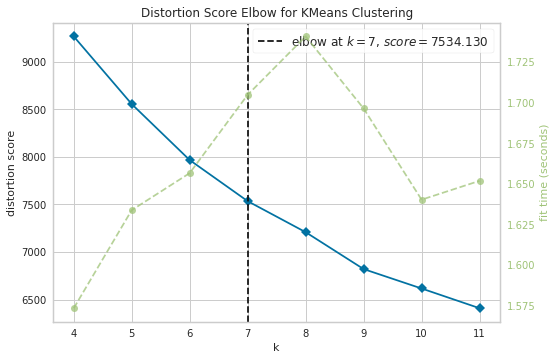

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
visualizer = KElbowVisualizer(model, k=(4, 12))
visualizer.fit(X)
visualizer.poof()

In [19]:
from sklearn.datasets import make_blobs

In [20]:
A, b = make_blobs(centers=8, n_features=12, shuffle=True, random_state=42)

In [21]:
A

array([[ -5.31523631,  -8.82437441,   2.57408468, ...,   3.73982025,
         -4.98790629,   1.11435885],
       [ -3.93040915,  -3.37075711,   4.41905174, ...,  -0.92784616,
          4.78038185,  -1.44717787],
       [ -2.32174974,  -4.29399784,   7.18264669, ...,   9.03761792,
          6.63994201,  -7.54887327],
       ...,
       [ -3.34917623,  -4.19060962,   6.74120239, ...,   9.18226161,
          4.80750826,  -4.83666984],
       [ -9.93647824,   6.7862694 ,   4.21396877, ...,   3.31618428,
         -3.73069164,  -9.0780907 ],
       [ -1.10640331,   7.61243507,   5.22673593, ...,   4.23001453,
        -10.65061383,   9.87178947]])

In [22]:
b

array([3, 7, 5, 3, 2, 0, 5, 2, 4, 7, 0, 2, 7, 0, 1, 3, 6, 1, 6, 4, 3, 4,
       6, 2, 0, 0, 7, 3, 4, 1, 0, 7, 1, 3, 4, 3, 2, 2, 6, 4, 7, 7, 0, 4,
       0, 6, 0, 7, 6, 4, 4, 1, 7, 5, 3, 1, 6, 6, 3, 3, 0, 3, 6, 2, 4, 1,
       3, 7, 2, 0, 4, 5, 1, 6, 4, 3, 5, 5, 7, 5, 0, 5, 1, 2, 1, 2, 5, 1,
       2, 2, 5, 6, 1, 5, 7, 1, 2, 5, 6, 0])

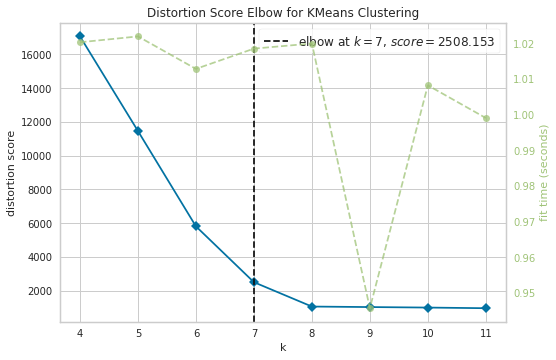

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
viz = KElbowVisualizer(model, k=(4, 12))
viz.fit(A)
viz.poof()

In [24]:
A.shape

(100, 12)

In [25]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [26]:
bc['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [27]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 

In [28]:
#!pip install category_encoders

In [29]:
from category_encoders import TargetEncoder

In [30]:
df = pd.DataFrame({'Animal':['cat', 'hamster', 'cat', 'cat', 'dog', 'hamster', 'cat', 'dog', 'cat', 'dog'], 'target':[1, 0,0, 1, 1, 1, 0, 1, 0, 0], })

In [31]:
df

,Animal,target
0,cat,1
1,hamster,0
2,cat,0
3,cat,1
4,dog,1
5,hamster,1
6,cat,0
7,dog,1
8,cat,0
9,dog,0


In [32]:
df.groupby('Animal').count()

,target
Animal,
cat,5
dog,3
hamster,2


In [33]:
pd.crosstab(df['Animal'], df['target'])

target,0,1
Animal,,
cat,3,2
dog,1,2
hamster,1,1


In [34]:
te = TargetEncoder()
df['target1_encoder'] = te.fit_transform(df['Animal'], df['target'])

In [35]:
df

,Animal,target,target1_encoder
0,cat,1,0.401799
1,hamster,0,0.500000
2,cat,0,0.401799
3,cat,1,0.401799
4,dog,1,0.646800
5,hamster,1,0.500000
6,cat,0,0.401799
7,dog,1,0.646800
8,cat,0,0.401799
9,dog,0,0.646800


In [36]:
le = LabelEncoder()
df['AnimalLabelEncoded'] = le.fit_transform(df['Animal'])

In [37]:
df

,Animal,target,target1_encoder,AnimalLabelEncoded
0,cat,1,0.401799,0
1,hamster,0,0.500000,2
2,cat,0,0.401799,0
3,cat,1,0.401799,0
4,dog,1,0.646800,1
5,hamster,1,0.500000,2
6,cat,0,0.401799,0
7,dog,1,0.646800,1
8,cat,0,0.401799,0
9,dog,0,0.646800,1


In [38]:
df = pd.DataFrame({'Animal':['cat', 'hamster', 'cat', 'cat', 'dog', 'hamster', 'cat', 'dog', 'cat', 'dog'], 'target':[1, 0,0, 1, 1, 1, 0, 1, 0, 0], })
ohe = OneHotEncoder(categories = 'auto')
oneHotEncoded = ohe.fit_transform(df['Animal'].values.reshape(-1, 1)).toarray()
df_new = pd.concat([df, pd.DataFrame(oneHotEncoded)], axis=1)
df_new.columns = ['Animal','Target',
                     'isCat','isDog','isHamster']
df_new

,Animal,Target,isCat,isDog,isHamster
0,cat,1,1.0,0.0,0.0
1,hamster,0,0.0,0.0,1.0
2,cat,0,1.0,0.0,0.0
3,cat,1,1.0,0.0,0.0
4,dog,1,0.0,1.0,0.0
5,hamster,1,0.0,0.0,1.0
6,cat,0,1.0,0.0,0.0
7,dog,1,0.0,1.0,0.0
8,cat,0,1.0,0.0,0.0
9,dog,0,0.0,1.0,0.0


# EM and KMeand

In [39]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from collections import Counter
import seaborn as sns
from scipy.stats import mode

In [40]:
sns.set_style('darkgrid')

In [41]:
iris = datasets.load_iris()

In [42]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [43]:
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width' ]
y.columns = ['target']

In [44]:
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [45]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [47]:
Counter(y.target) # so we have 3 categories

Counter({0: 50, 1: 50, 2: 50})

KMeans accuracy: 0.8933333333333333


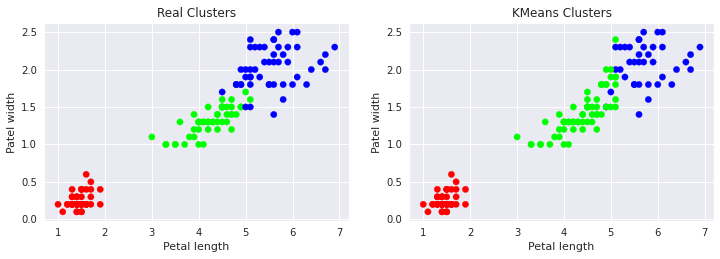

In [74]:
# build the model
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

labels = np.zeros_like(clusters)
for i in range(3):
    cat = (clusters == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
print(f'KMeans accuracy: {acc}')

plt.figure(figsize=(12, 8))
colormap = np.array(['red', 'lime', 'blue'])

## The real clusters
plt.subplot(2, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target],s=40)
plt.title('Real Clusters')
plt.xlabel('Petal length')
plt.ylabel('Patel width')

# The predicted clusters
plt.subplot(2,2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[labels],s=40)
plt.title('KMeans Clusters')
plt.xlabel('Petal length')
plt.ylabel('Patel width')

plt.show()

## Geenral EM for GMM (gausian mixture models)

EM accuracy: 0.9666666666666667


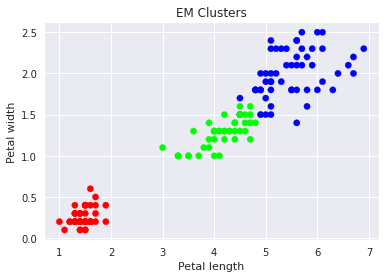

In [77]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)
scaled_x = pd.DataFrame(scaled_x)

gmm = GaussianMixture(n_components=3)
gmm_y = gmm.fit_predict(scaled_x)  

labels = np.zeros_like(gmm_y)

for i in range(3): # we have 3 clusters
    cat = (gmm_y == i)
    labels[cat] = mode(iris.target[cat])[0]
acc = accuracy_score(labels, iris.target)
print(f'EM accuracy: {acc}')

plt.scatter(X.petal_length, X.petal_width, c = colormap[gmm_y], s=40)
plt.title('EM Clusters')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()